# Test of CSV file produced using ROOT converter

In this notebook I'll test the macro, written in python, used for converting a ROOT structure (Tree) into a CSV file for ML analysis.

The CSV is located inside the directory output, created by the python macro **examplemacro.py**:

In [ ]:
!ls /Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/

In [1]:
%cd /Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/output
!head -5 output_nocut.csv

/Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/output







To analyze it, we need the ROOT python module and pandas for the CSV analysis:

In [2]:
from ROOT import TCanvas,TH1F
import pandas as pd

Welcome to JupyROOT 6.12/04


Now we need to read the CSV:

In [3]:
df2 = pd.read_csv('./output_nocut.csv')

This creates a pandas db that can be displayed showing its content:

In [4]:
df2

,Event,dtPrimitive.id_r,dtPrimitive.id_eta,dtPrimitive.id_phi,dtPrimitive.bxTrackFinder(),dtPrimitive.phiGlb(),genParticle.pt,dtPrimitive.bx
0,1,1,1,2,0,0.547525,9.452828,0
1,1,2,1,2,0,0.519693,9.452828,0
2,1,3,2,2,0,0.499429,9.452828,0
3,1,4,2,2,0,0.489663,9.452828,0
4,2,4,1,1,0,-0.322266,164.478928,0
5,2,3,1,12,0,5.961246,164.478928,0
6,3,1,0,4,0,1.816158,91.713860,0
7,3,3,0,4,0,1.812007,91.713860,0
8,3,4,0,4,0,1.811519,91.713860,0
9,4,2,-2,10,0,4.605700,139.442352,0


Using pyROOT we create an histogram:

In [5]:
c3 = TCanvas("c3","c3")
histo = TH1F("test_histogram_nocut1","id_r test plot",5,0,5)

Now we loop in a column and we fill a histogram with it

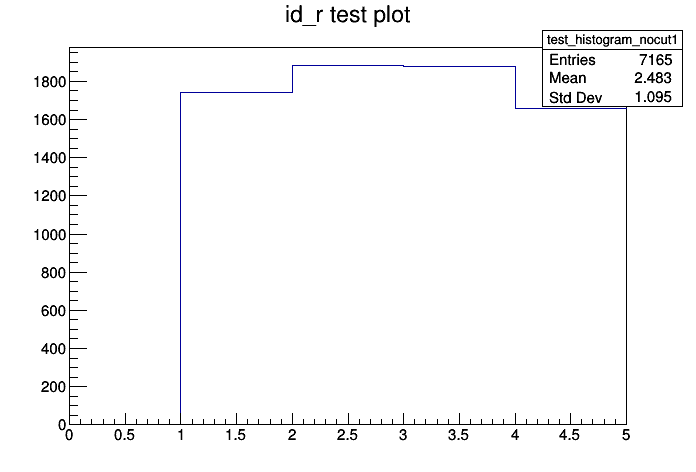

In [6]:
for index, row in df2.iterrows():
    histo.Fill(row["dtPrimitive.id_r"])
histo.Draw()
c3.Draw()

The same for another variable, for instance, **Pt** of the generated muon

In [7]:
c4 = TCanvas("c4","c4")
histo2 = TH1F("test_histogram_nocut2","pt test plot",100,0,215)

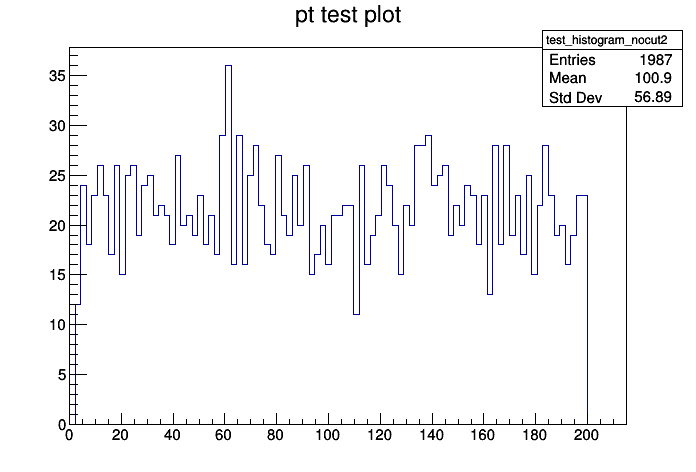

In [8]:
a = 0
for index, row in df2.iterrows():
    if(row["Event"] == a):
        continue
    histo2.Fill(row["genParticle.pt"])
    a = row["Event"]
histo2.Draw()
c4.Draw()

As we can see, there are only 1987 entry for the pt instead of 2000 (coming from the generated muons). This difference is caused by muons that do not show up in the detector and, therefore, don't generate any primitive.